<a href="https://colab.research.google.com/github/BuczynskiRafal/pipe_calculations/blob/main/catchment_prototyping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get requires

In [2]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install -U catchment_prototyping-0.0.1.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./catchment_prototyping-0.0.1.tar.gz
  Created wheel for catchment-prototyping: filename=catchment_prototyping-0.0.1-py3-none-any.whl size=7952 sha256=26c2e1c2de5cf0d483b5c193129e37c86ec622911380d2cba792012e0fc50ab3
  Stored in directory: /root/.cache/pip/wheels/4d/25/ed/57ce42be143bfd3089a75054c0bc6d234ef3c24da0ecb20aa0
Successfully built catchment-prototyping


In [8]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from fuzzy.categories import LandForm, LandUse
from fuzzy.engine import Prototype, engine
from fuzzy.memberships import membership
from skfuzzy import control as ctrl
import plotly.graph_objects as go
from numpy.core._multiarray_umath  import  ndarray
from matplotlib import cm

# Create object for prototyping

## Select land use and type form

In [10]:
land_use = LandUse.flats_and_plateaus
land_form = LandForm.permeable_areas

## Prepare object for calculations

In [12]:
clc = Prototype(land_use=land_use, land_form=land_form)

## Get example results

In [13]:
slope = clc.slope_result
impervious = clc.impervious_result
catchment = clc.get_populate(clc.catchment_result)
print(slope)
print(impervious)
print(catchment)


3.0909090909090913
30.000000000000007
meadows


In [14]:
result = clc.slope_result

## Plot result

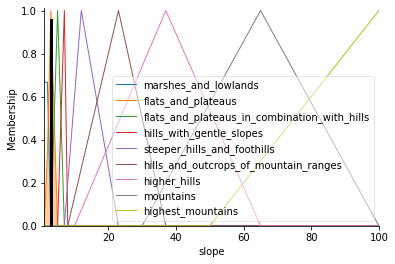

In [17]:
membership.slope.view(sim=engine.slope_simulation)

## Plot universe of slope

In [24]:
# x = land_use_type
# y = land_form_type

land_use_type = np.arange(0, 10.1, 1)
land_form_type = np.arange(0, 14.1, 1)
land_use_type, land_form_type = np.meshgrid(land_use_type, land_form_type)
pred_val: np.ndarray = np.zeros(shape=(len(land_form_type), len(land_form_type[1])))

for i in range(1, len(land_use_type[1])):
    for j in range(1, len(land_form_type)):
        simulate = Prototype(land_use=i, land_form=j)
        pred_val[j][i] = simulate.slope_result

fig = go.Figure(data=[go.Surface(x=land_use_type, y=land_form_type, z=pred_val,
    contours = {
        "z": {"show": True, "start": 0, "end": 100, "size": 5, "color":"grey"}
    },
    # colorscale=[[0, 'rgb(100,0,255)'], [1, 'rgb(255,0,0)']],
    )])
fig.update_layout(title='Slope evaluation using the fuzzy logic model',
                  scene=dict(
                      xaxis_title='Land use [‰]',
                      yaxis_title='Land form [m/s]',
                      zaxis_title='Slope evaluation'),
                  autosize=True,
                  width=900, height=900,)
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="black", project_z=True))
fig.show()

## Plot universe of impervious

In [26]:
# x = land_use_type
# y = land_form_type

land_use_type = np.arange(0, 10.1, 1)
land_form_type = np.arange(0, 14.1, 1)
land_use_type, land_form_type = np.meshgrid(land_use_type, land_form_type)
pred_val: np.ndarray = np.zeros(shape=(len(land_form_type), len(land_form_type[1])))

for i in range(1, len(land_use_type[1])):
    for j in range(1, len(land_form_type)):
        simulate = Prototype(land_use=i, land_form=j)
        pred_val[j][i] = simulate.impervious_result

fig = go.Figure(data=[go.Surface(x=land_use_type, y=land_form_type, z=pred_val,
    contours = {
        "z": {"show": True, "start": 0, "end": 100, "size": 5, "color":"grey"}
    },
    # colorscale=[[0, 'rgb(100,0,255)'], [1, 'rgb(255,0,0)']],
    )])
fig.update_layout(title='Slope evaluation using the fuzzy logic model',
                  scene=dict(
                      xaxis_title='Land use [‰]',
                      yaxis_title='Land form [m/s]',
                      zaxis_title='Slope evaluation'),
                  autosize=True,
                  width=900, height=900,)
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="black", project_z=True))
fig.show()

# Get category of catchment

In [25]:
category = clc.get_populate(clc.catchment_result)
category

'mountains'